Distance to the particle horizon
Distance to the event horizon
Distance to the Hubble sphere (where vrecession = c)


In [12]:
# First let's set up our packages
import numpy as np
from matplotlib import pyplot as plt
from scipy import integrate

# And set some constants
c = 299792.458 # km/s (speed of light)

H0kmsmpc = 70.  # Hubble constant in km/s/Mpc
H0s = H0kmsmpc * 3.2408e-20 # H0 in inverse seconds is H0 in km/s/Mpc * (3.2408e-20 Mpc/km)
H0y = H0s * 3.154e7 * 1.e9 # H0 in inverse Giga years is H0 in inverse seconds * (3.154e7 seconds/year) * (1e9 years / Giga year)
print('Hubble time = ',1/H0y,'Gyr')

cH0mpc = c/H0kmsmpc   # c/H0 in Mpc  (the km/s cancel out in the numerator and denominator)  - Hubble length c/H0
cH0Glyr = cH0mpc * 3.262 / 1000 #c/H0 in billions of light years.  There are 3.262 light year / parsec

Hubble time =  13.976165695516954 Gyr


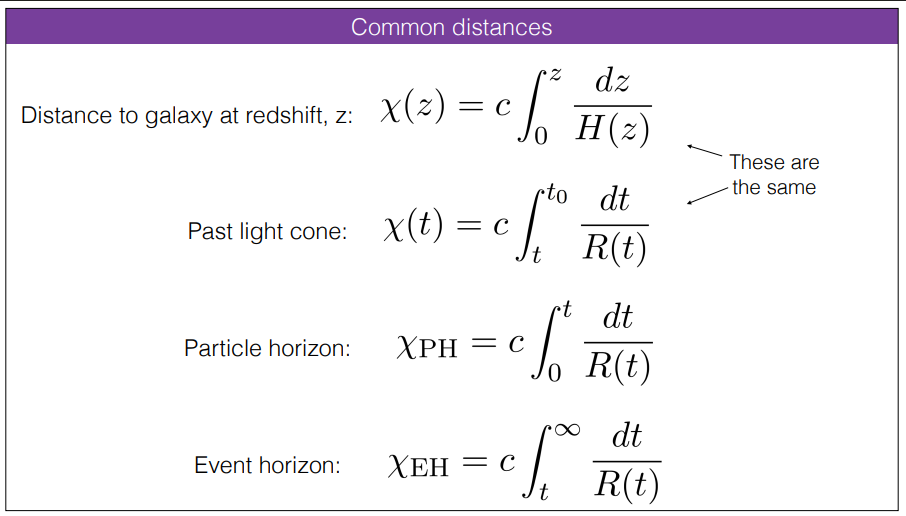

Distance to the particle horizon

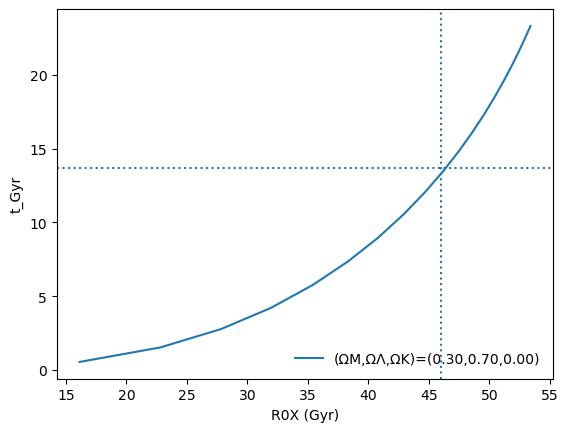

In [30]:
om = 0.3  # Matter
ol = 0.7  # Lambda
ok = 1-om-ol  # curvature
a_arr = np.arange(0.1,2,0.1)

def adot_a_inv(a,om,ol,ok):                         # 1/(adot *a)   the integrand of EQN 23   
    adot_a_inv = (a**2)*(np.sqrt((om * a**(-3)) + (ok * a**(-2)) + ol)) 
    return 1.0/adot_a_inv

R0X = []    # Define an empty list to store age_Gyr values
for a in a_arr:
    xx = integrate.quad(adot_a_inv, 0, a, args=(om,ol,ok))  # RHS = RHS of EQN (8)* H_0   Note: integral limits in green, they are between what values of a you want to know the time for
    R0X.append(xx[0] * cH0Glyr)


def adot(a,om,ol,ok):                         # 1/(adot)   the integrand of EQN 24  
    adot = (a)*(np.sqrt((om * a**(-3)) + (ok * a**(-2)) + ol))  
    return 1.0/adot

t_Gyr = []    # Define an empty list to store t_Gyr values - this is the age at a in a_arr
for a in a_arr:
    yy = integrate.quad(adot, 0, a, args=(om,ol,ok))  # RHS = RHS of EQN (8)* H_0   Note: integral limits in green, they are between what values of a you want to know the time for
    t_Gyr.append(yy[0] / H0y)



plt.plot(R0X,t_Gyr,label='(ΩM,ΩΛ,ΩK)=(%.2f,%.2f,%.2f)'%(om,ol,ok))
plt.axvline(x=46,linestyle=':') # Plot some crosshairs 
plt.axhline(y=13.7,linestyle=':')
plt.xlabel('R0X (Gyr)')
plt.ylabel('t_Gyr')
plt.legend(loc='lower right',frameon=False)
plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


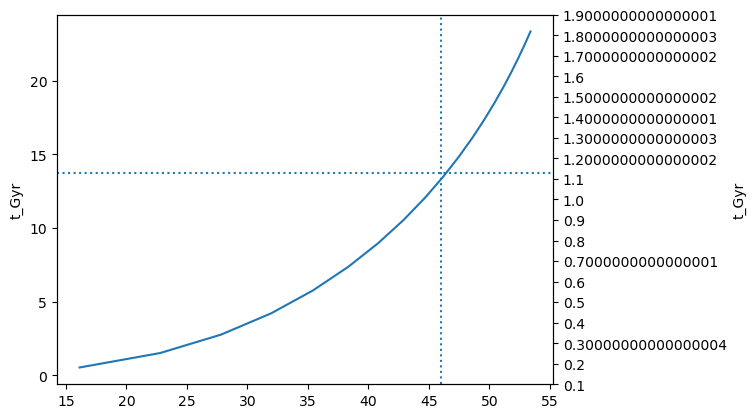

In [34]:
om = 0.3  # Matter
ol = 0.7  # Lambda
ok = 1-om-ol  # curvature
a_arr = np.arange(0.1,2,0.1)

def adot_a_inv(a,om,ol,ok):                         # 1/(adot *a)   the integrand of EQN 23   
    adot_a_inv = (a**2)*(np.sqrt((om * a**(-3)) + (ok * a**(-2)) + ol)) 
    return 1.0/adot_a_inv

R0X = []    # Define an empty list to store age_Gyr values
for a in a_arr:
    xx = integrate.quad(adot_a_inv, 0, a, args=(om,ol,ok))  # RHS = RHS of EQN (8)* H_0   Note: integral limits in green, they are between what values of a you want to know the time for
    R0X.append(xx[0] * cH0Glyr)


def adot(a,om,ol,ok):                         # 1/(adot)   the integrand of EQN 24  
    adot = (a)*(np.sqrt((om * a**(-3)) + (ok * a**(-2)) + ol))  
    return 1.0/adot

t_Gyr = []    # Define an empty list to store t_Gyr values - this is the age at a in a_arr
for a in a_arr:
    yy = integrate.quad(adot, 0, a, args=(om,ol,ok))  # RHS = RHS of EQN (8)* H_0   Note: integral limits in green, they are between what values of a you want to know the time for
    t_Gyr.append(yy[0] / H0y)


fig, ax1 = plt.subplots()
ax2 = ax1.twinx()

ax1.plot(R0X,t_Gyr, label='(ΩM,ΩΛ,ΩK)=(%.2f,%.2f,%.2f)' % (om, ol, ok))
ax1.axvline(x=46, linestyle=':') 
ax1.axhline(y=13.7, linestyle=':')

# Set the label for the left y-axis
ax1.set_ylabel('t_Gyr')

# Set the tick labels for the right y-axis to be the corresponding values of a_arr
ax2.set_yticks(np.arange(len(a_arr)))
ax2.set_yticklabels(a_arr)

# Set the label for the right y-axis
ax2.set_ylabel('Scale factor a')

plt.ylabel('t_Gyr')
plt.legend(loc='lower right',frameon=False)
plt.show()